<a href="https://colab.research.google.com/github/SupidchayaTangkidwanich/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)

In [ ]:
import pandas as pd # วิธีเรียกใช้ คือ import ตามด้วยชื่อ package |pandas ไว้ใช้เก็บข้อมูล #  ตั้งชื่อให้ package ที่โหลดมาใหม่ว่า pd

In [ ]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os # จัดการไฟล์เเละ path(ที่อยู่ของไฟล์)

In [ ]:
flights = pd.read_csv('/content/drive/MyDrive/Mini_Exam/flights.csv') # ที่อยู่ไฟล์ของเรา # โหลด data เข้ามา
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [ ]:
airports = pd.read_csv('/content/drive/MyDrive/Mini_Exam/airports.csv') # โหลด data เข้ามา
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [ ]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [ ]:
gen_exams('623020542-0')

รหัสนักศึกษา 623020542-0 ทำข้อ 0 และ 5


# 0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด


รวมตาราง

In [ ]:
Data = flights.merge(airports,how='left',left_on='รหัสสนามบินปลายทาง',right_on='รหัสสนามบิน') #รวมตาราง ซึ่งเอาข้อมูลชุดที่ 1 ไว้ทางด้านซ้าย ข้อมูลชุดที่ 2 ไว้ทางขวา และข้อมูลชุดที่ 1 เป็นตารางหลัก เชื่อมกันด้วย รหัสสนามบินเเละรหัสสนามบินปลายทาง
Data

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,13303,Miami,FL,Miami International
1,19,5,DL,14869,12478,0,-8,12478,New York,NY,John F. Kennedy International
2,19,5,DL,14057,14869,-4,-15,14869,Salt Lake City,UT,Salt Lake City International
3,19,5,DL,15016,11433,28,24,11433,Detroit,MI,Detroit Metro Wayne County
4,19,5,DL,11193,12892,-6,-11,12892,Los Angeles,CA,Los Angeles International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,14869,Salt Lake City,UT,Salt Lake City International
2702214,19,6,DL,10397,13495,-2,-3,13495,New Orleans,LA,Louis Armstrong New Orleans International
2702215,19,6,DL,10140,10397,18,9,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702216,19,6,DL,10397,13244,10,7,13244,Memphis,TN,Memphis International


รัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุด

สนามบินปลายทาง =  สายการบินขาเข้า 

In [ ]:
Data.groupby('รัฐ').count() # ทำการหาจำนวนของเเต่ละคอลัมน์โดยการใช้ รัฐเป็นตัวตั้ง 

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
AK,7700,7700,7700,7700,7700,7700,7700,7700,7700,7700
AZ,100710,100710,100710,100710,100710,100710,100710,100710,100710,100710
CA,380046,380046,380046,380046,380046,380046,380046,380046,380046,380046
CO,97259,97259,97259,97259,97259,97259,97259,97259,97259,97259
CT,13042,13042,13042,13042,13042,13042,13042,13042,13042,13042
DC,80536,80536,80536,80536,80536,80536,80536,80536,80536,80536
FL,208139,208139,208139,208139,208139,208139,208139,208139,208139,208139
GA,148563,148563,148563,148563,148563,148563,148563,148563,148563,148563
HI,28395,28395,28395,28395,28395,28395,28395,28395,28395,28395


In [ ]:
Answer = Data.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) # sort_values by column ที่ไม่มี missing 
Answer

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
CA,380429,380429,380429,380429,380429,380429,380429,380429,380429,380429
TX,275328,275328,275328,275328,275328,275328,275328,275328,275328,275328
FL,208291,208291,208291,208291,208291,208291,208291,208291,208291,208291
IL,176857,176857,176857,176857,176857,176857,176857,176857,176857,176857
GA,148524,148524,148524,148524,148524,148524,148524,148524,148524,148524
NY,132522,132522,132522,132522,132522,132522,132522,132522,132522,132522
NC,104839,104839,104839,104839,104839,104839,104839,104839,104839,104839
AZ,100824,100824,100824,100824,100824,100824,100824,100824,100824,100824
CO,96919,96919,96919,96919,96919,96919,96919,96919,96919,96919


In [ ]:
Max = Answer.iloc[:1,[3]] # ตัดข้อมูลด้วย .iloc โดยเอาเเต่คอลัมน์ รหัสสนามบินต้นทาง เพื่อดูรัฐที่มีจำนวนเครื่องบินขาเข้าที่มากที่สุด
Max

,รหัสสนามบินต้นทาง
รัฐ,
CA,380429


รัฐที่มีจำนวนเครื่องบินขาเข้าน้อยที่สุด

In [ ]:
Min = Answer.iloc[-1:,[3]] # ตัดข้อมูลด้วย .iloc โดยเอาเเต่คอลัมน์ รหัสสนามบินต้นทาง เพื่อดูรัฐที่มีจำนวนเครื่องบินขาเข้าที่น้อยที่สุด
Min

,รหัสสนามบินต้นทาง
รัฐ,
AK,7711


# 5. วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

วันธรรมดา

In [ ]:
monday = Data['วันในสัปดาห์'] == 1
tuesday = Data['วันในสัปดาห์'] == 2
wednesday =  Data['วันในสัปดาห์'] == 3
thursday =  Data['วันในสัปดาห์'] == 4
friday = Data['วันในสัปดาห์'] == 5
Normal = Data[monday | tuesday | wednesday | thursday | friday]
Normal # ทำการชี้เพื่อเอาข้อมูลในคอลัมน์วันในสัปดาห์ เพื่อรวมลิสต์ของวันธรรมดา

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,13303,Miami,FL,Miami International
1,19,5,DL,14869,12478,0,-8,12478,New York,NY,John F. Kennedy International
2,19,5,DL,14057,14869,-4,-15,14869,Salt Lake City,UT,Salt Lake City International
3,19,5,DL,15016,11433,28,24,11433,Detroit,MI,Detroit Metro Wayne County
4,19,5,DL,11193,12892,-6,-11,12892,Los Angeles,CA,Los Angeles International
...,...,...,...,...,...,...,...,...,...,...,...
2702141,18,5,DL,14869,12478,0,-1,12478,New York,NY,John F. Kennedy International
2702142,18,5,DL,11433,13930,-4,1,13930,Chicago,IL,Chicago O'Hare International
2702143,18,5,DL,11433,10693,-9,-12,10693,Nashville,TN,Nashville International
2702144,18,5,DL,14869,14679,8,2,14679,San Diego,CA,San Diego International


In [ ]:
Normal.groupby('วันในสัปดาห์').count() # หาจำนวนเครื่องบินขาเข้าทั้งหมดของคอลัมน์ในเเต่ละวันในสัปดาห์

,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
วันในสัปดาห์,,,,,,,,,,
1,407837,407837,407837,407837,407837,407837,407837,407837,407837,407837
2,397594,397594,397594,397594,397594,397594,397594,397594,397594,397594
3,403072,403072,403072,403072,403072,403072,403072,403072,403072,403072
4,406563,406563,406563,406563,406563,406563,406563,406563,406563,406563
5,396387,396387,396387,396387,396387,396387,396387,396387,396387,396387


In [ ]:
Ans_NM = Normal.groupby('วันในสัปดาห์').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) # sort_values by column ที่ไม่มี missing
Ans_NM

,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
วันในสัปดาห์,,,,,,,,,,
1,407837,407837,407837,407837,407837,407837,407837,407837,407837,407837
4,406563,406563,406563,406563,406563,406563,406563,406563,406563,406563
3,403072,403072,403072,403072,403072,403072,403072,403072,403072,403072
2,397594,397594,397594,397594,397594,397594,397594,397594,397594,397594
5,396387,396387,396387,396387,396387,396387,396387,396387,396387,396387


In [ ]:
Sum_NM = Ans_NM[['รหัสสนามบินปลายทาง']].sum() # ใช้ฟังก์ชั่น เพื่อรวมจำนวนเครื่องบินขาเข้าในวันธรรมดาทั้งหมด
Sum_NM

รหัสสนามบินปลายทาง    2011453
dtype: int64

วันเสาร์-อาทิตย์

In [ ]:
saturday = Data['วันในสัปดาห์'] == 6
sunday = Data['วันในสัปดาห์'] == 7
Holiday = Data[saturday | sunday]
Holiday # ทำการชี้เพื่อเอาข้อมูลในคอลัมน์วันในสัปดาห์ เพื่อรวมลิสต์ของวันหยุด

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
31,20,6,DL,11292,12953,-5,6,12953,New York,NY,LaGuardia
32,20,6,DL,14869,14893,-5,-14,14893,Sacramento,CA,Sacramento International
33,20,6,DL,12953,11697,-3,21,11697,Fort Lauderdale,FL,Fort Lauderdale-Hollywood International
34,20,6,DL,14869,14908,-6,-14,14908,Santa Ana,CA,John Wayne Airport-Orange County
35,20,6,DL,12892,15304,21,-2,15304,Tampa,FL,Tampa International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,14869,Salt Lake City,UT,Salt Lake City International
2702214,19,6,DL,10397,13495,-2,-3,13495,New Orleans,LA,Louis Armstrong New Orleans International
2702215,19,6,DL,10140,10397,18,9,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702216,19,6,DL,10397,13244,10,7,13244,Memphis,TN,Memphis International


In [ ]:
Holiday.groupby('วันในสัปดาห์').count()  # หาจำนวนเครื่องบินขาเข้าทั้งหมดของคอลัมน์ในเเต่ละวันในสัปดาห์

,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
วันในสัปดาห์,,,,,,,,,,
6,318537,318537,318537,318537,318537,318537,318537,318537,318537,318537
7,372228,372228,372228,372228,372228,372228,372228,372228,372228,372228


In [ ]:
Ans_HD = Holiday.groupby('วันในสัปดาห์').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) # sort_values by column ที่ไม่มี missing
Ans_HD

,วันในเดือน,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
วันในสัปดาห์,,,,,,,,,,
7,372228,372228,372228,372228,372228,372228,372228,372228,372228,372228
6,318537,318537,318537,318537,318537,318537,318537,318537,318537,318537


In [ ]:
Sum_HD = Ans_HD[['รหัสสนามบินปลายทาง']].sum()  # ใช้ฟังก์ชั่น เพื่อรวมจำนวนเครื่องบินขาเข้าในวันเสาร์-อาทิตย์ ทั้งหมด
Sum_HD 

รหัสสนามบินปลายทาง    690765
dtype: int64

หาความต่างของจำนวนทั้งสองกรณี

In [ ]:
Sum_NM - Sum_HD 

รหัสสนามบินปลายทาง    1320688
dtype: int64

จากโจทย์ถามว่า วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน

วันธรรมดา มีจำนวนเครื่องบินขาเข้า เท่ากับ 2,011,453 ลำ


วันเสาร์-อาทิตย์ มีจำนวนเครื่องบินขาเข้า เท่ากับ 690,765 ลำ

ดังนั้น วันธรรมดาจะมีจำนวนเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์ เท่ากับ 1,320,688 ลำ

# ให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ


โจทย์ : สร้างกราฟเเท่งของจำนวนเครื่องบินขาเข้าในเเต่ละรัฐ

In [ ]:
from matplotlib import pyplot as plt  # วิธีเรียกใช้ คือ import ตามด้วยชื่อ package # ตั้งชื่อ pyplot as plt ไว้ในการวาดกราฟ

In [ ]:
import numpy as np  # วิธีเรียกใช้ คือ import ตามด้วยชื่อ package # ตั้งชื่อ numpy as np ใช้ในการคำนวนทางคณิตศาสตร์

In [ ]:
Data_drop = Answer.iloc[:,[3]] # ตัดข้อมูลเอาเฉพาะคอลัมน์ รหัสสนามบินต้นทาง เป็น จำนวนเครื่องบินขาเข้า
Data_drop

,รหัสสนามบินต้นทาง
รัฐ,
CA,380429
TX,275328
FL,208291
IL,176857
GA,148524
NY,132522
NC,104839
AZ,100824
CO,96919


In [ ]:
Data_drop.reset_index(inplace=True) # ตัดช่องว่างออก
Data_drop

,รัฐ,รหัสสนามบินต้นทาง
0,CA,380429
1,TX,275328
2,FL,208291
3,IL,176857
4,GA,148524
5,NY,132522
6,NC,104839
7,AZ,100824
8,CO,96919
9,NV,88179


No handles with labels found to put in legend.


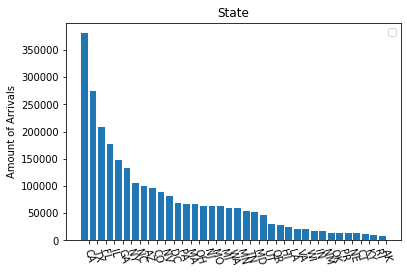

In [ ]:
plt.bar(np.arange(len(Data_drop.iloc[:,1])), Data_drop.iloc[:,1]) # plt.bar ไว้ใช้ในการสร้างกราฟแท่ง 
plt.ylabel('Amount of Arrivals') # ให้ เเกน y เป็น จำนวนเครื่องบินขาเข้า # ply.ylabel ใช้ในการตั้งชื่อกราฟ เเกน y
plt.title('State') # ให้ เเกน x เป็น รัฐ # ply.title ใช้ในการตั้งชื่อกราฟ
plt.xticks(np.arange(len(Data_drop.iloc[:,0]))+0.5, Data_drop.iloc[:,0],rotation=-75)
plt.legend();